In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from mpdaf.obj import Image, WCS
import astropy.units as u
from mpdaf.obj import deg2sexa, sexa2deg
data_path = "/home/carlos/Desktop/HST Data Reduction/Data/"

[INFO] 573 x 559 Image (/home/carlos/Desktop/HST Data Reduction/Data/Removed OffSet/F160w_shifted.fits)
[INFO] .data(573 x 559) (no unit), no noise
[INFO] center:(00:39:06.5657,09:03:11.5739) size:(49.915",50.529") step:(0.087",0.090") rot:-0.2 deg frame:ICRS


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


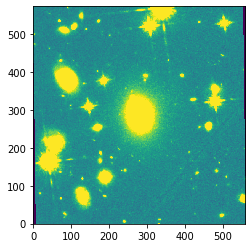

In [3]:
hst = Image(data_path+'Removed OffSet/F160w_shifted.fits', ext=1) #Open the image file
hst.info() #Display information about the file
hst.plot(zscale=True)

[INFO] 250 x 250 Image (/home/carlos/Desktop/HST Data Reduction/Data/Removed OffSet/Muse_aligned.fits)
[INFO] .data(250 x 250) (1e-20 erg / (Angstrom cm2 s)), no noise
[INFO] center:(00:39:07.0985,09:03:11.6099) size:(50.000",50.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5


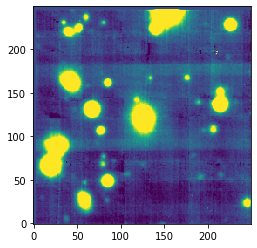

In [5]:
muse = Image(data_path+'Removed OffSet/Muse_aligned.fits', ext=1) #Open the image file
muse.info() #Display information about the file
muse.plot(zscale=True)

In [6]:
ref = hst.data_header['DEC_APER'], hst.data_header['RA_APER'] #Reference Px
print(ref)

(0.6518055555556, 135.7982083333)


[INFO] 115 x 111 Image (/home/carlos/Desktop/HST Data Reduction/Data/Removed OffSet/F160w_shifted.fits)
[INFO] .data(115 x 111) (no unit), no noise
[INFO] center:(00:39:06.4789,09:03:11.5679) size:(10.018",10.033") step:(0.087",0.090") rot:-0.2 deg frame:ICRS


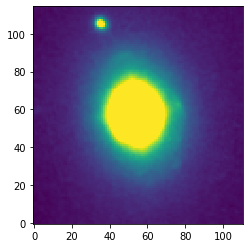

In [7]:
hst_centerized = hst.subimage(center=ref, unit_center=u.deg, size=10.0, unit_size=u.arcsec)
    #center: determine the new center
    #unit_center: astropy units of center coordenate. None for px units
    #size: if you disere a new cut, size define the width
    #unit_size: astropy units for the size. None for px units
hst_centerized.info()
hst_centerized.plot(zscale=True)

[INFO] 50 x 50 Image (/home/carlos/Desktop/HST Data Reduction/Data/Removed OffSet/Muse_aligned.fits)
[INFO] .data(50 x 50) (1e-20 erg / (Angstrom cm2 s)), no noise
[INFO] center:(00:39:06.4985,09:03:11.5699) size:(10.000",10.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5


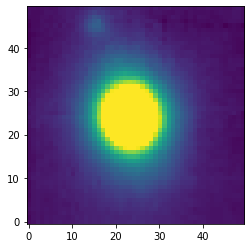

In [8]:
muse_centerized = muse.subimage(center=ref, unit_center=u.deg, size=10.0, unit_size=u.arcsec)
    #center: determine the new center
    #unit_center: astropy units of center coordenate. None for px units
    #size: if you disere a new cut, size define the width
    #unit_size: astropy units for the size. None for px units
muse_centerized.info()
muse_centerized.plot(zscale=True)

In [9]:
muse_new = muse_centerized.adjust_coordinates(hst_centerized)

[INFO] Shifted the coordinates by dy=0.1 dx=-0.188 arcsec


In [8]:
hst_centerized.write(data_path+"Centered/HST_final.fits")
muse_new.write(data_path+"Centered/MUSE_final.fits")

INFO: 
        Inconsistent SIP distortion information is present in the current WCS:
        SIP coefficients were detected, but CTYPE is missing "-SIP" suffix,
        therefore the current WCS is internally inconsistent.

        Because relax has been set to True, the resulting output WCS will have
        "-SIP" appended to CTYPE in order to make the header internally consistent.

        However, this may produce incorrect astrometry in the output WCS, if
        in fact the current WCS is already distortion-corrected.

        Therefore, if current WCS is already distortion-corrected (eg, drizzled)
        then SIP distortion components should not apply. In that case, for a WCS
        that is already distortion-corrected, please remove the SIP coefficients
        from the header.

         [astropy.wcs.wcs]


In [7]:
135.80054612668  - 135.800437145 

0.00010898168000039732

In [4]:
0,00010898168000039732 = 0.4''

SyntaxError: invalid token (<ipython-input-4-4c4a1f3aaf62>, line 1)

In [5]:
0.65181129524664 - 0.651744194129

6.71011176400782e-05

In [6]:
6,71011176400782e-05 = 0.24''

(6, 710111764.00782)

In [8]:
135.7982391 - 135.80054612668

-0.00230702668000049

In [9]:
0.6518052 - 0.65181129524664

-6.095246640080987e-06